# Project Definition

The global outbreak of the COVID-19 pandemic has underscored the critical need for accurate and timely health data analysis. ABC Health Analytics Company recognizes the significance of leveraging data to understand and respond to the evolving challenges posed by the pandemic.
In this context, the company is initiating a project aimed at comprehensive data analysis and visualization of COVID-19 datasets using Python. The goal of this capstone project is to perform a comprehensive analysis of worldwide COVID-19 data. We will leverage data visualization techniques using Python libraries such as Pandas, Matplotlib, and seaborn. The dataset used for
this analysis is sourced from “Our World in Data” and contains information on various COVID 19 metrics across different countries.

In [ ]:
#import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


#Activity 1: Data Loading and Exploration

In [ ]:
#1. Load the COVID-19 DataFrame using pandas from the provided dataset files.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/owid-covid-data.csv')

In [ ]:
#2. Display the first 5 and last 5 rows of the DataFrame.
display(pd.concat([df.head(5), df.tail(5)]))

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
358833,ZWE,Africa,Zimbabwe,2023-11-18,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358834,ZWE,Africa,Zimbabwe,2023-11-19,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358835,ZWE,Africa,Zimbabwe,2023-11-20,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358836,ZWE,Africa,Zimbabwe,2023-11-21,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358837,ZWE,Africa,Zimbabwe,2023-11-22,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
#3. Check for missing values in the dataset and decide on a strategy to handle them.
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

continent                                   17108
total_cases                                 38210
new_cases                                    9806
new_cases_smoothed                          11065
total_deaths                                59752
                                            ...  
human_development_index                     89049
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 63, dtype: int64


In [ ]:
#4. Remove the columns with more than 90% of missing values.
threshold = 0.9
df = df.loc[:, df.isnull().mean() < threshold]

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=True))
print(missing_values[missing_values > 0].shape)

new_deaths_per_million                          9749
new_deaths                                      9749
new_cases                                       9806
new_cases_per_million                           9806
new_deaths_smoothed_per_million                10979
new_deaths_smoothed                            10979
new_cases_smoothed                             11065
new_cases_smoothed_per_million                 11065
continent                                      17108
life_expectancy                                28677
total_cases                                    38210
total_cases_per_million                        38210
population_density                             54166
total_deaths                                   59752
total_deaths_per_million                       59752
diabetes_prevalence                            66321
median_age                                     75537
aged_70_older                                  78377
cardiovasc_death_rate                         

Even after dropping columns with more than 90% missing values, there are still an extensive selection of columns with large numbers of missing values (55 columns).

Strategy:
1. Relevance of each column:
Depending on the analysis required, columns not critical to the analysis may be dropped.
2. Imputation
Mean/Median Imputation: For columns with fewer missing values or where averages make sense (e.g., stringency_index, population_density, median_age, life_expectancy), replace missing values with the mean or median.
3. Drop Rows with Critical Missing Data
If some rows have missing values in essential columns (e.g., total_cases, total_deaths, total_cases_per_million, total_deaths_per_million), we'll consider dropping those rows, particularly if the dataset is large enough to sustain this without bias.

In [ ]:
#5. Convert the 'date' column to the datetime data type.
df['date'] = pd.to_datetime(df['date'])

#Activity 2: Data Cleaning and Feature Engineering

Enhancing data relevance and structure, enabling focused analysis on key COVID-19 indicators and demographic factors.

In [ ]:
#1. Impute missing values in the dataset columns
columns_to_impute = missing_values[missing_values > 0].index.tolist()

numerical_cols = df[columns_to_impute].select_dtypes(include=['number']).columns.tolist()
categorical_cols = df[columns_to_impute].select_dtypes(include=['object']).columns.tolist()

#for numerical columns, we'll use the median to impute missing values
for col in numerical_cols:
  df[col] = df[col].fillna(df[col].median())

#for categorical columns, we'll use most frequent value (mode) to impute missing values
for col in categorical_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#2. Remove duplicate rows from the DataFrame.
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

df = df.drop_duplicates()
print(f"Shape of the DataFrame after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of the DataFrame after removing duplicates: (358838, 59)


In [ ]:
#3. Create new features if needed (e.g., extract year and month from the 'date' column).

#daily case growth rate
df['daily_case_growth_rate'] = df['new_cases'].pct_change() * 100

#daily death growth rate
df['daily_death_growth_rate'] = df['new_deaths'].pct_change() * 100

#year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
#4. Explore unique countries in the dataset and count the total number of countries.
unique_countries = df['location'].unique()
total_countries = len(unique_countries)
print(f"Total number of unique countries: {total_countries}")

Total number of unique countries: 255


#Activity 3: Worldwide COVID-19 Overview  
Providing a global and temporal perspective on COVID-19, identifying patterns and correlations crucial for strategic decision-making.

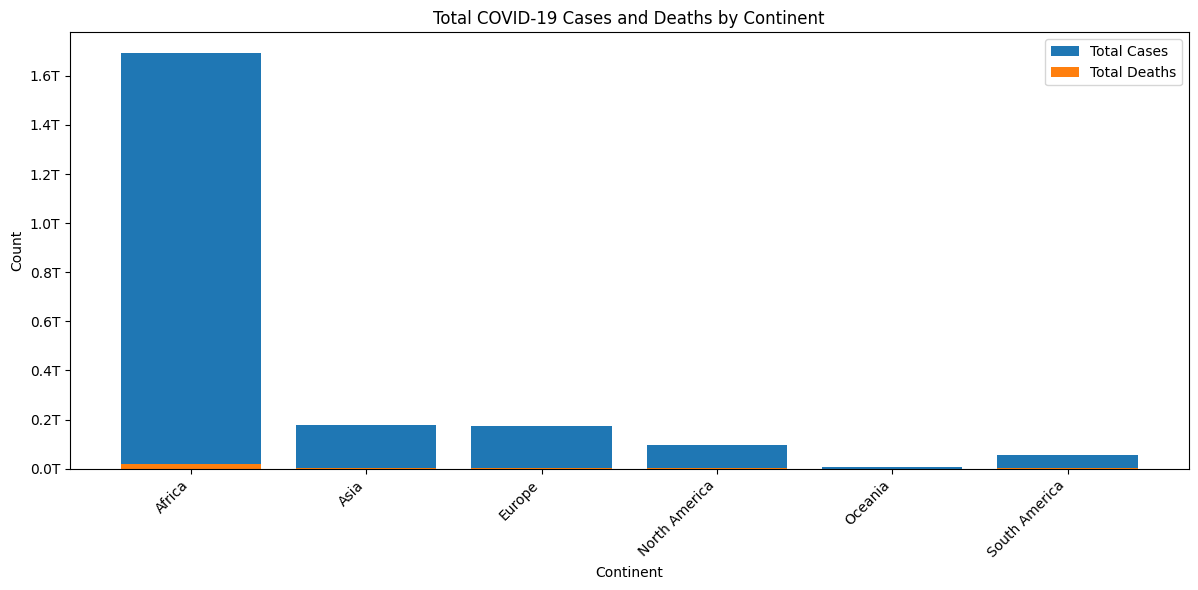

In [ ]:
#1. Visualize the WHO Regions with total COVID-19 cases and total deaths by using bar plots.
region_data = df.groupby('continent')[['total_cases', 'total_deaths']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(region_data['continent'], region_data['total_cases'], label='Total Cases')
plt.bar(region_data['continent'], region_data['total_deaths'], label='Total Deaths')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Total COVID-19 Cases and Deaths by Continent')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}T'.format(x*1e-12)))

plt.show()

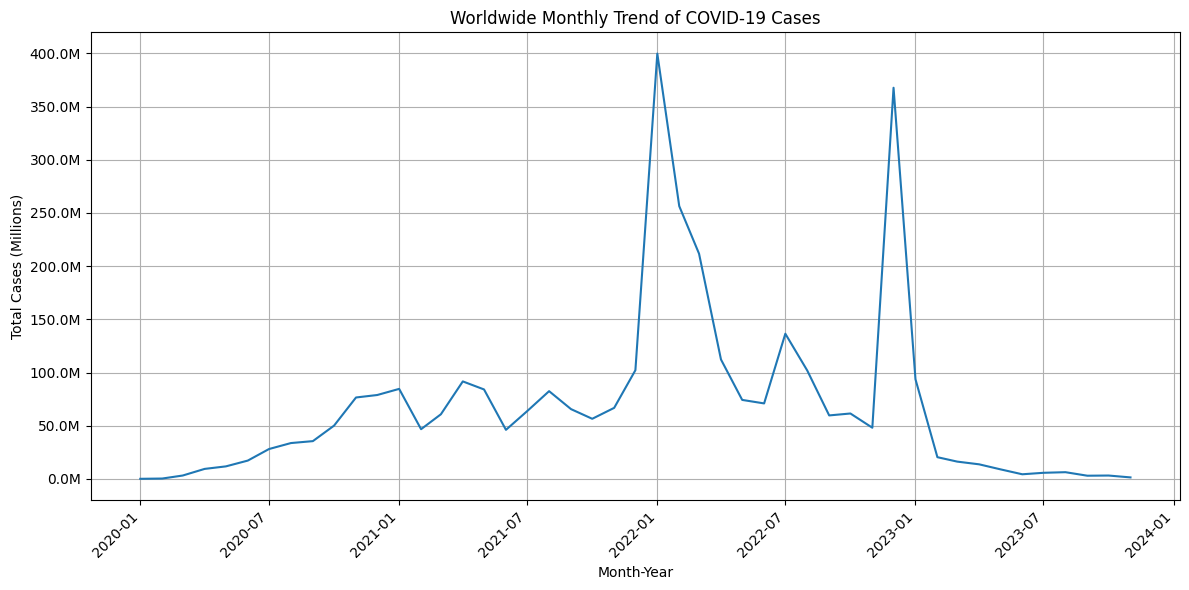

In [ ]:
#2. Explore the world wide monthly trend of COVID-19 cases using a line plot.
monthly_cases = df.groupby(['year', 'month'])['new_cases'].sum().reset_index()
monthly_cases['month_year'] = pd.to_datetime(monthly_cases[['year', 'month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_cases['month_year'], monthly_cases['new_cases'])
plt.xlabel('Month-Year')
plt.ylabel('Total Cases (Millions)')
plt.title('Worldwide Monthly Trend of COVID-19 Cases')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
plt.grid(True)
plt.tight_layout()
plt.show()

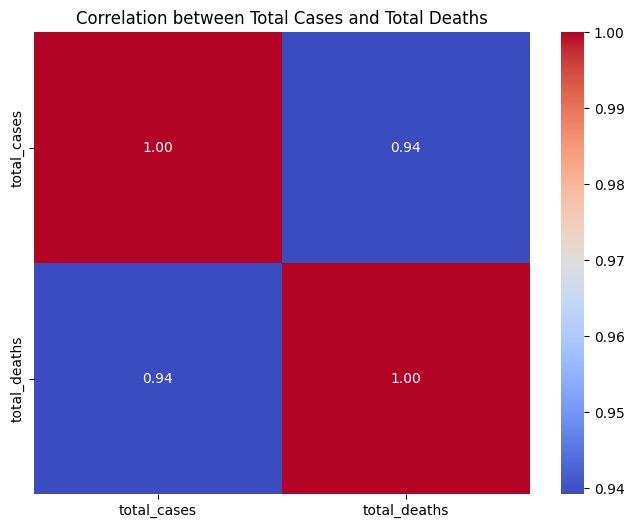

In [ ]:
#3. Investigate the correlation between total cases and total deaths using a heatmap..
correlation_data = df[['total_cases', 'total_deaths']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Total Cases and Total Deaths')
plt.show()

A positive correlation (closer to 1) indicates that as total cases increase, total deaths also tend to increase.

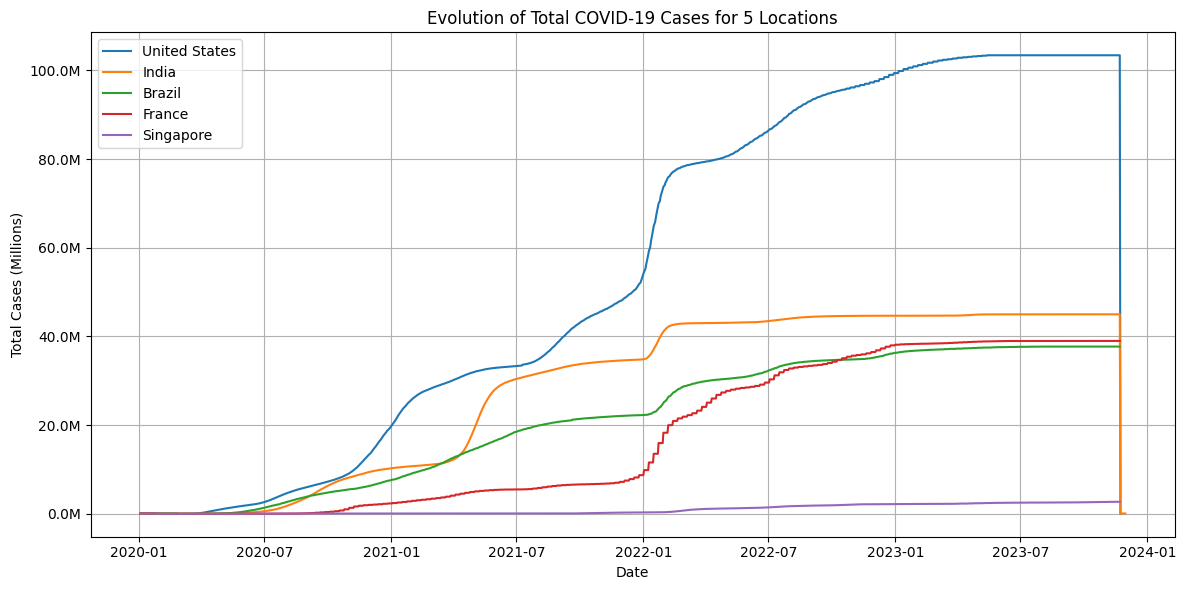

In [ ]:
#4. Analyze how total cases have evolved over time for a specific location (e.g., India).
locations = ['United States', 'India', 'Brazil', 'France', 'Singapore']

plt.figure(figsize=(12, 6))
for location in locations:
    location_data = df[df['location'] == location]
    plt.plot(location_data['date'], location_data['total_cases'], label=location)

    # Add line labels with total cases at the end of each line
    last_date_index = location_data.index[-1]  # Get the index of the last date
    last_date = location_data.loc[last_date_index, 'date']  # Get the last date
    last_total_cases = location_data.loc[last_date_index, 'total_cases']  # Get total cases for the last date
    #plt.text(last_date, last_total_cases, f'{location}: {last_total_cases/1e6:.1f}M', ha='left', va='center')


plt.xlabel('Date')
plt.ylabel('Total Cases (Millions)')  # Label y-axis
plt.title(f'Evolution of Total COVID-19 Cases for {len(locations)} Locations')
plt.grid(True)
plt.legend()

# Format y-axis labels in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))

plt.tight_layout()
plt.show()

#Activity 4: Regional Analysis
Unveiling regional nuances in COVID-19 dynamics and identifying patterns in case distribution and fatality across time and continents.

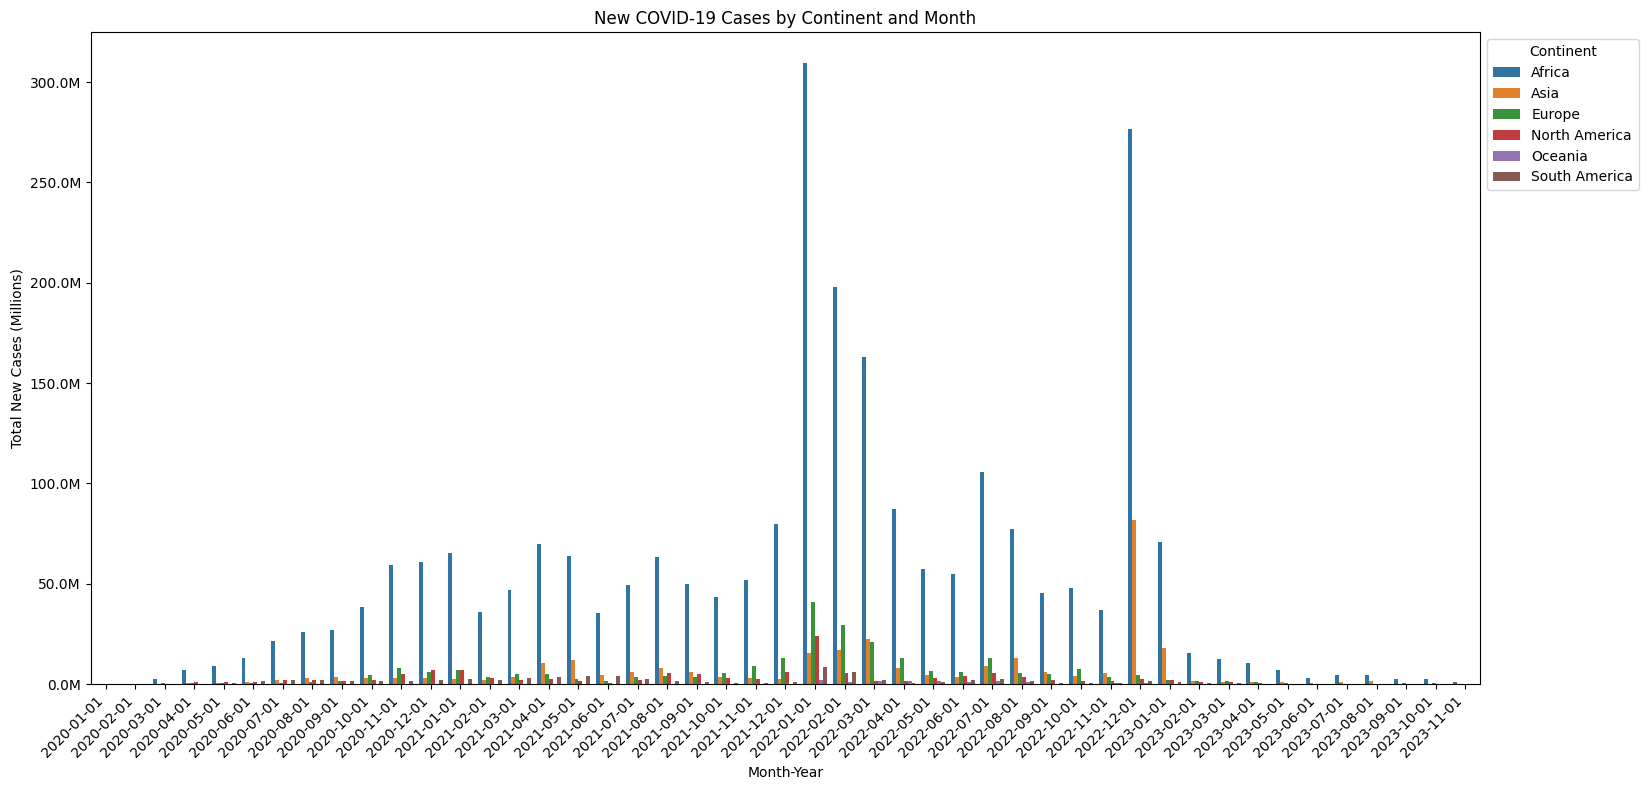

In [ ]:
#1. Create a grouped bar chart to visualize new cases by continent and month.

#Create a new DataFrame 'continent_month_cases' grouped by continent, year and month.
continent_month_cases = df.groupby(['continent', df['date'].dt.year.rename('year'), df['date'].dt.month.rename('month')])['new_cases'].sum().reset_index()

#Create 'month_year' column for better visualization.
continent_month_cases['month_year'] = pd.to_datetime(continent_month_cases[['year', 'month']].assign(DAY=1))

#Plot the grouped bar chart.
plt.figure(figsize=(15, 8))
sns.barplot(x='month_year', y='new_cases', hue='continent', data=continent_month_cases)

plt.xlabel('Month-Year')
plt.ylabel('Total New Cases (Millions)')
plt.title('New COVID-19 Cases by Continent and Month')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
plt.tight_layout()
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

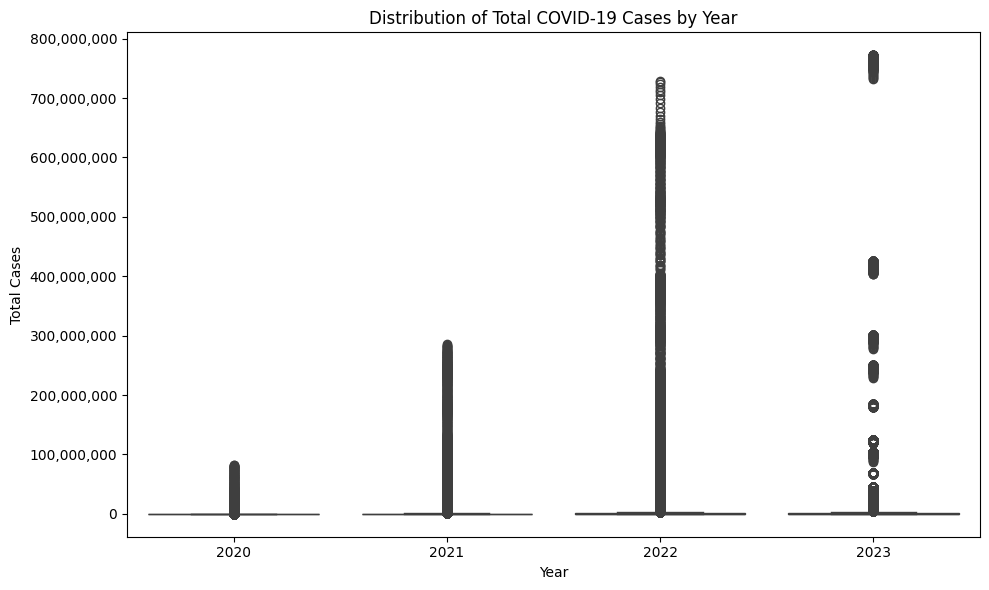

In [ ]:
#2. Visualize the distribution of total COVID-19 cases by year using a box plot.import pandas as pd

#Extract the year from the 'date' column.
df['year'] = df['date'].dt.year

#Create the box plot using seaborn.
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='total_cases', data=df)

plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Distribution of Total COVID-19 Cases by Year')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) # Format y-axis labels
plt.tight_layout()
plt.show()

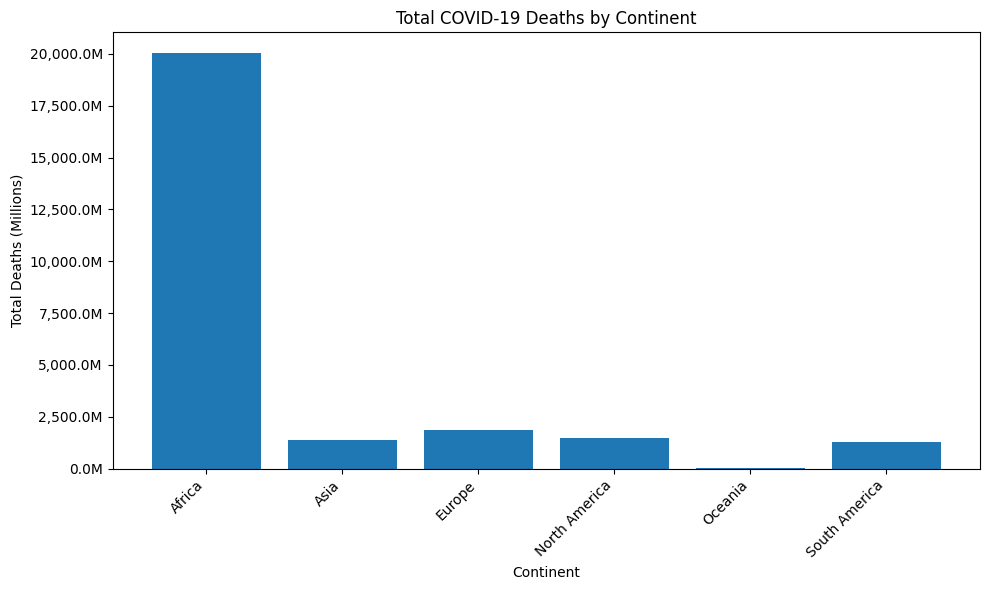

In [ ]:
#3. Compare total deaths across different continents using a bar plot.

#Group data by continent and sum total deaths.
continent_deaths = df.groupby('continent')['total_deaths'].sum().reset_index()

#Create the bar plot.
plt.figure(figsize=(10, 6))
plt.bar(continent_deaths['continent'], continent_deaths['total_deaths'])

plt.xlabel('Continent')
plt.ylabel('Total Deaths (Millions)')
plt.title('Total COVID-19 Deaths by Continent')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6))) # Format y-axis labels
plt.tight_layout()
plt.show()

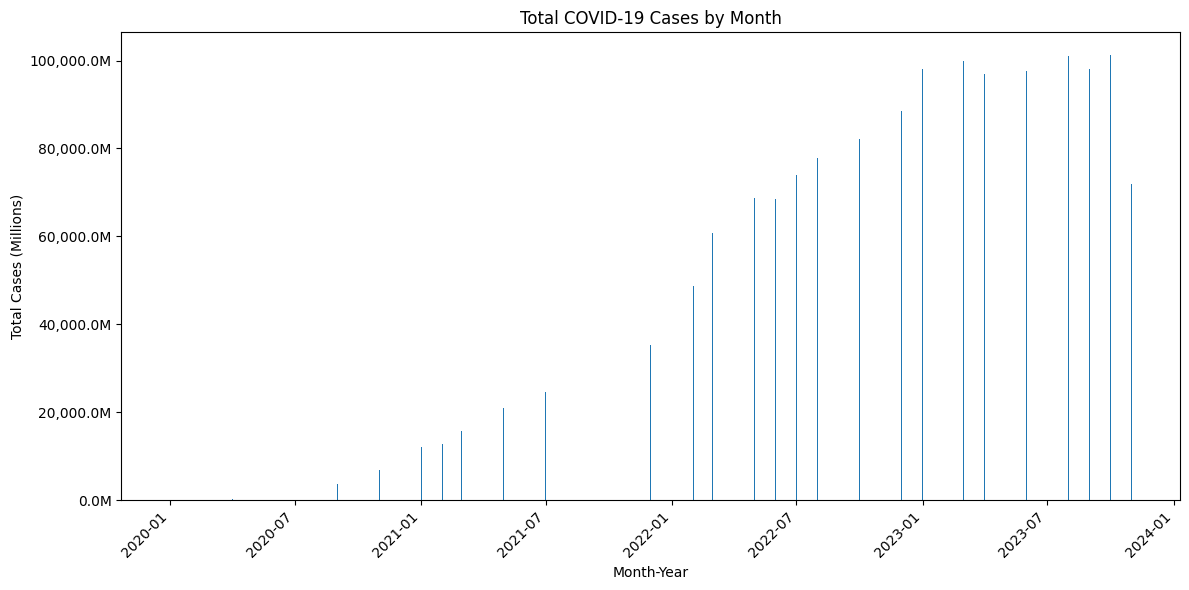

In [ ]:
#4. Analyze the total cases on a month-by-month basis using a bar plot.

#Extract month and year from the 'date' column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Group data by month and year, and sum total cases
monthly_cases = df.groupby(['year', 'month'])['total_cases'].sum().reset_index()

#Create a 'month_year' column for better visualization
monthly_cases['month_year'] = pd.to_datetime(monthly_cases[['year', 'month']].assign(DAY=1))

#Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(monthly_cases['month_year'], monthly_cases['total_cases'])

plt.xlabel('Month-Year')
plt.ylabel('Total Cases (Millions)')
plt.title('Total COVID-19 Cases by Month')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))  # Format y-axis labels
plt.tight_layout()
plt.show()

#Activity 5: Time Series Analysis
Capturing the daily dynamics of COVID-19, assessing the impact of vaccination, and monitoring testing metrics for a comprehensive global overview.

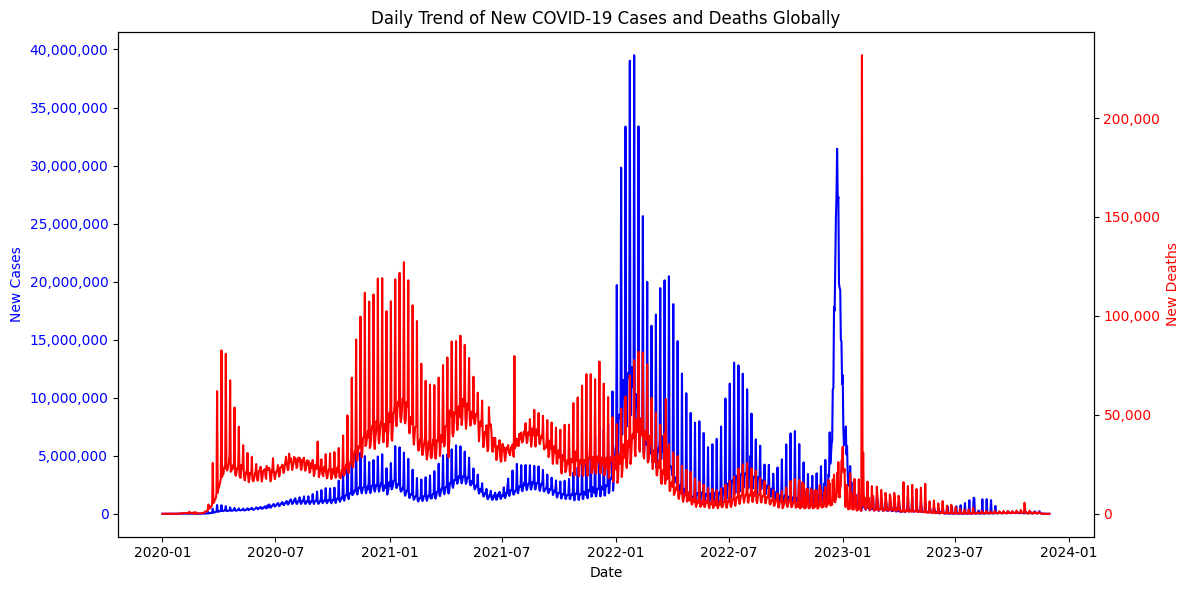

In [ ]:
#1. Explore the daily trend of new cases and new deaths globally using line plots.

#Group data by date and sum new cases and new deaths
daily_trend = df.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()

#Create the figure and primary axes
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot new cases on the primary axes
ax1.plot(daily_trend['date'], daily_trend['new_cases'], label='New Cases', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='blue')
ax1.tick_params('y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

#Create secondary axes
ax2 = ax1.twinx()

#Plot new deaths on the secondary axes
ax2.plot(daily_trend['date'], daily_trend['new_deaths'], label='New Deaths', color='red')
ax2.set_ylabel('New Deaths', color='red')
ax2.tick_params('y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

#Format and display the plot
plt.title('Daily Trend of New COVID-19 Cases and Deaths Globally')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

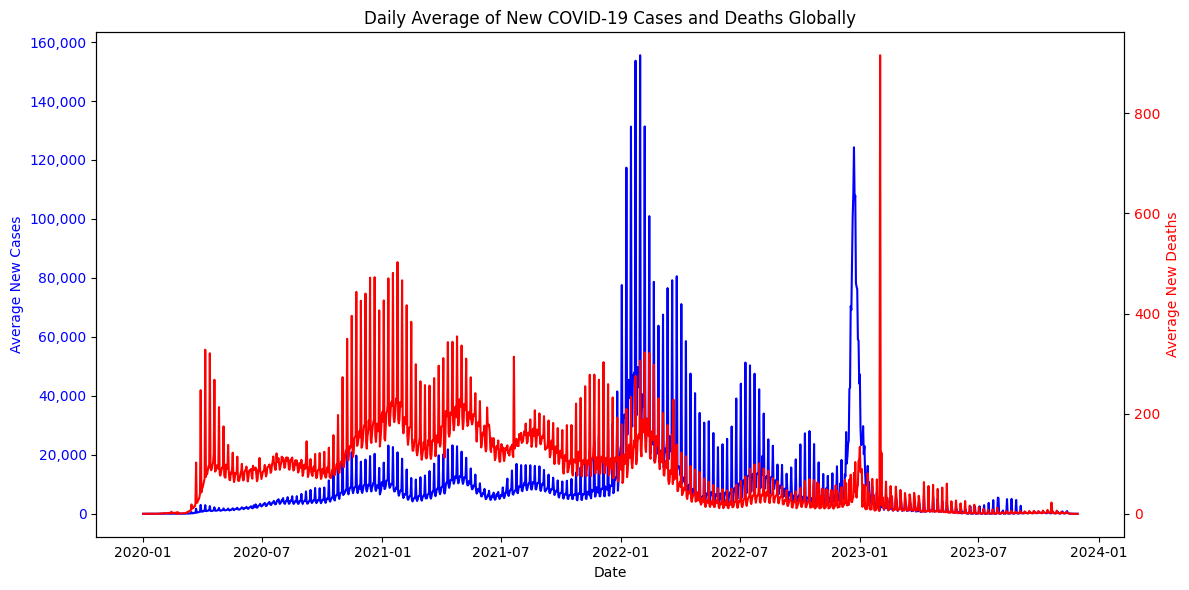

In [ ]:
#2. Calculate and visualise the daily average of new cases and deaths globally.

#Calculate daily averages
daily_averages = df.groupby('date')[['new_cases', 'new_deaths']].mean().reset_index()

#Rename columns for clarity
daily_averages.rename(columns={'new_cases': 'avg_new_cases', 'new_deaths': 'avg_new_deaths'}, inplace=True)

#Create the figure and primary axes
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot average new cases on the primary axes
ax1.plot(daily_averages['date'], daily_averages['avg_new_cases'], label='Average New Cases', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average New Cases', color='blue')
ax1.tick_params('y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

#Create secondary axes
ax2 = ax1.twinx()

#Plot average new deaths on the secondary axes
ax2.plot(daily_averages['date'], daily_averages['avg_new_deaths'], label='Average New Deaths', color='red')
ax2.set_ylabel('Average New Deaths', color='red')
ax2.tick_params('y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

#Format and display the plot
plt.title('Daily Average of New COVID-19 Cases and Deaths Globally')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

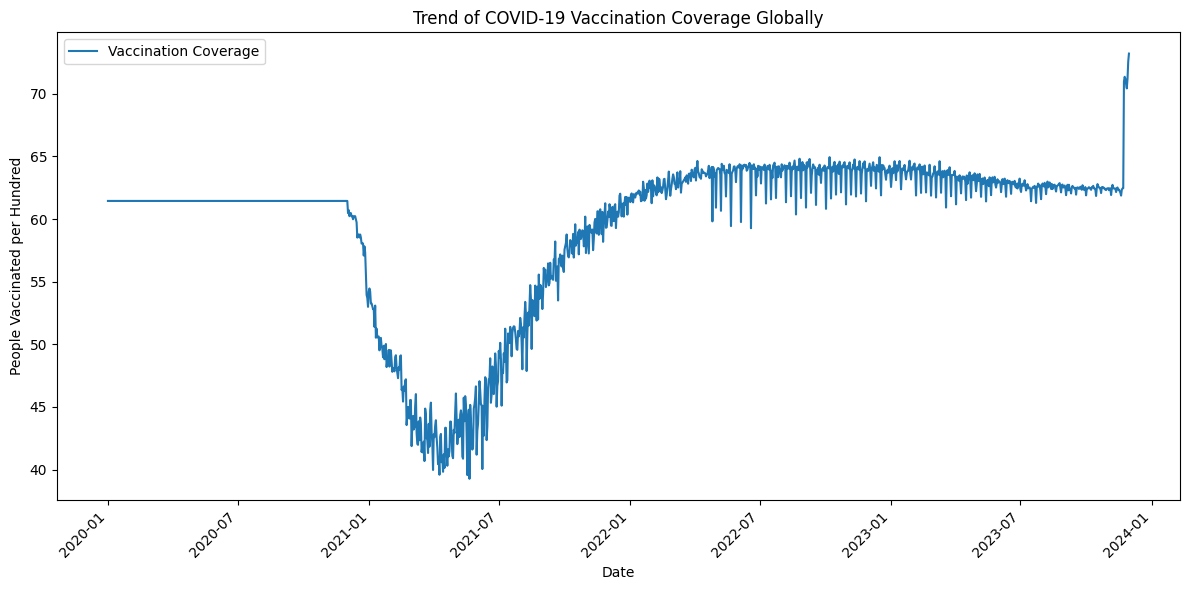

In [ ]:
#3. Explore the trend of vaccination coverage over time globally.

#Calculate global daily vaccination coverage
global_vaccination = df.groupby('date')['people_vaccinated_per_hundred'].mean().reset_index()

#Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(global_vaccination['date'], global_vaccination['people_vaccinated_per_hundred'], label='Vaccination Coverage')

plt.xlabel('Date')
plt.ylabel('People Vaccinated per Hundred')
plt.title('Trend of COVID-19 Vaccination Coverage Globally')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))  # Format y-axis labels
plt.legend()
plt.tight_layout()
plt.show()

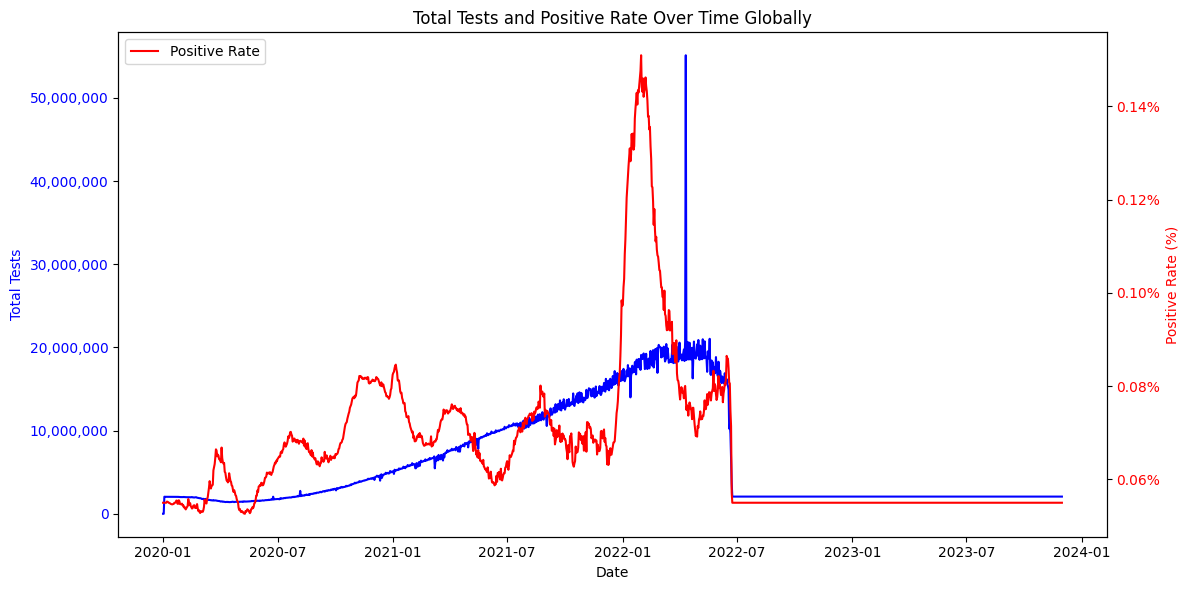

In [ ]:
#4. Analyze the total tests and positive rate over time globally.

#Calculate global daily total tests and positive rate
global_testing = df.groupby('date')[['total_tests', 'positive_rate']].mean().reset_index()

#Create the figure and primary axes
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot total tests on the primary axes
ax1.plot(global_testing['date'], global_testing['total_tests'], label='Total Tests', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Tests', color='blue')
ax1.tick_params('y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

#Create secondary axes
ax2 = ax1.twinx()

#Plot positive rate on the secondary axes
ax2.plot(global_testing['date'], global_testing['positive_rate'], label='Positive Rate', color='red')
ax2.set_ylabel('Positive Rate (%)', color='red')
ax2.tick_params('y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}%'.format(x)))  # Format as percentage

#Format and display the plot
plt.title('Total Tests and Positive Rate Over Time Globally')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()  # Adjust layout to prevent overlapping elements
plt.legend(loc='upper left') # Adjust legend location if needed
plt.show()

#Activity 6: In-Depth Country Analysis
Conducting an in-depth examination of specific countries, understanding the correlation between cases and deaths globally, and exploring continental variations in case distribution.

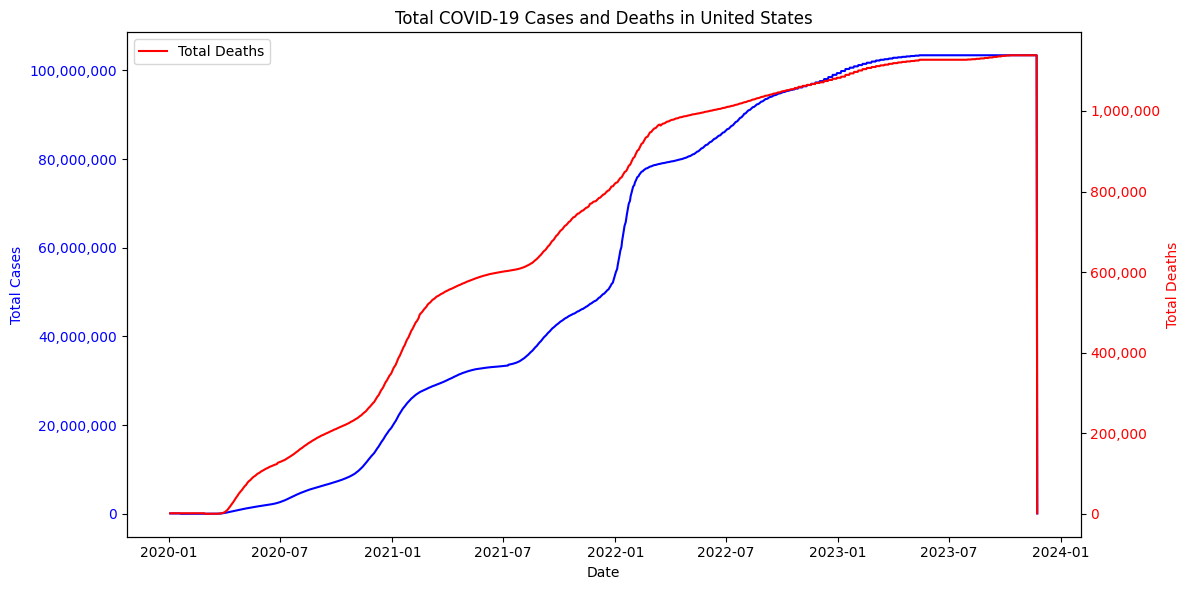

In [ ]:
#1. Visualize a specific country's total COVID-19 cases and deaths over time.

#Specify the country you want to visualize
country_name = "United States"  # Replace with the desired country name

#Filter the DataFrame for the specific country
country_data = df[df['location'] == country_name]

#Create the figure and primary axes
fig, ax1 = plt.subplots(figsize=(12, 6))

#Plot total cases on the primary axes
ax1.plot(country_data['date'], country_data['total_cases'], label='Total Cases', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color='blue')
ax1.tick_params('y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

#Create secondary axes
ax2 = ax1.twinx()

#Plot total deaths on the secondary axes
ax2.plot(country_data['date'], country_data['total_deaths'], label='Total Deaths', color='red')
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params('y', labelcolor='red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

#Format and display the plot
plt.title(f'Total COVID-19 Cases and Deaths in {country_name}')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()  # Adjust layout to prevent overlapping elements
plt.legend(loc='upper left') # Adjust legend location if needed
plt.show()

Enter the country name: United States
Enter the metric to plot (total_cases or total_deaths): total_deaths


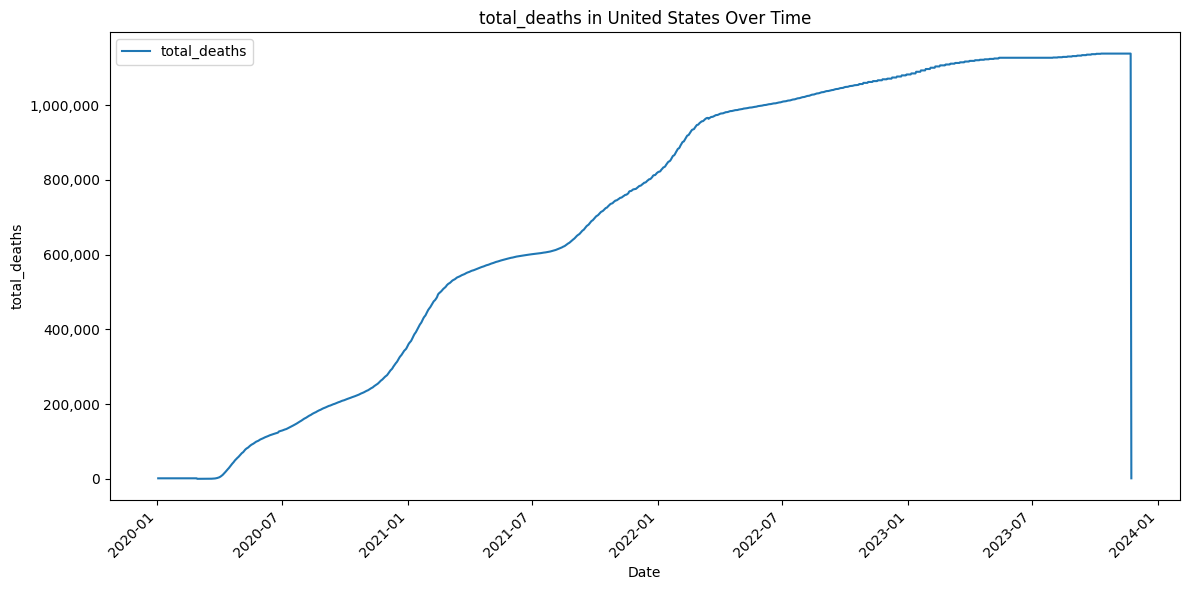

In [ ]:
#2. Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user-selected values.

# 1. Get user input for country and metric
country_name = input("Enter the country name: ")
metric = input("Enter the metric to plot (total_cases or total_deaths): ")

# 2. Filter the DataFrame based on user input
country_data = df[df['location'] == country_name]

# 3. Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(country_data['date'], country_data[metric], label=metric)

plt.xlabel('Date')
plt.ylabel(metric)
plt.title(f'{metric} in {country_name} Over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.legend()
plt.tight_layout()
plt.show()

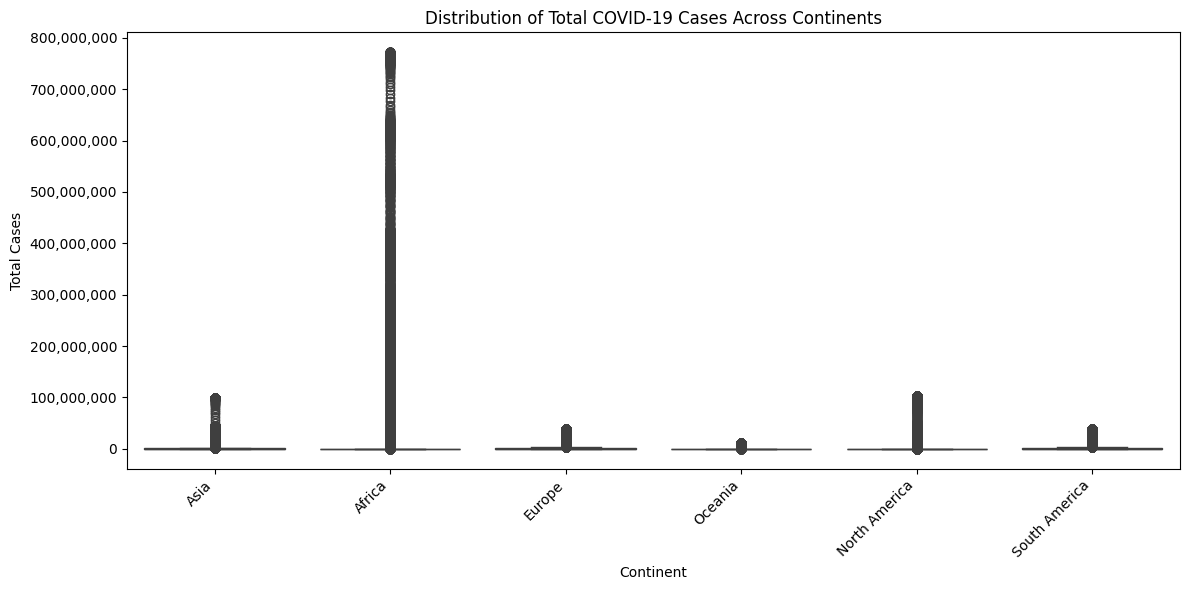

In [ ]:
#3. Analyze the distribution of total cases across different continents using a box plot.

#Create the box plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='continent', y='total_cases', data=df)

#Format the plot
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Distribution of Total COVID-19 Cases Across Continents')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))  # Format y-axis labels
plt.tight_layout()
plt.show()

Enter the country name: United States


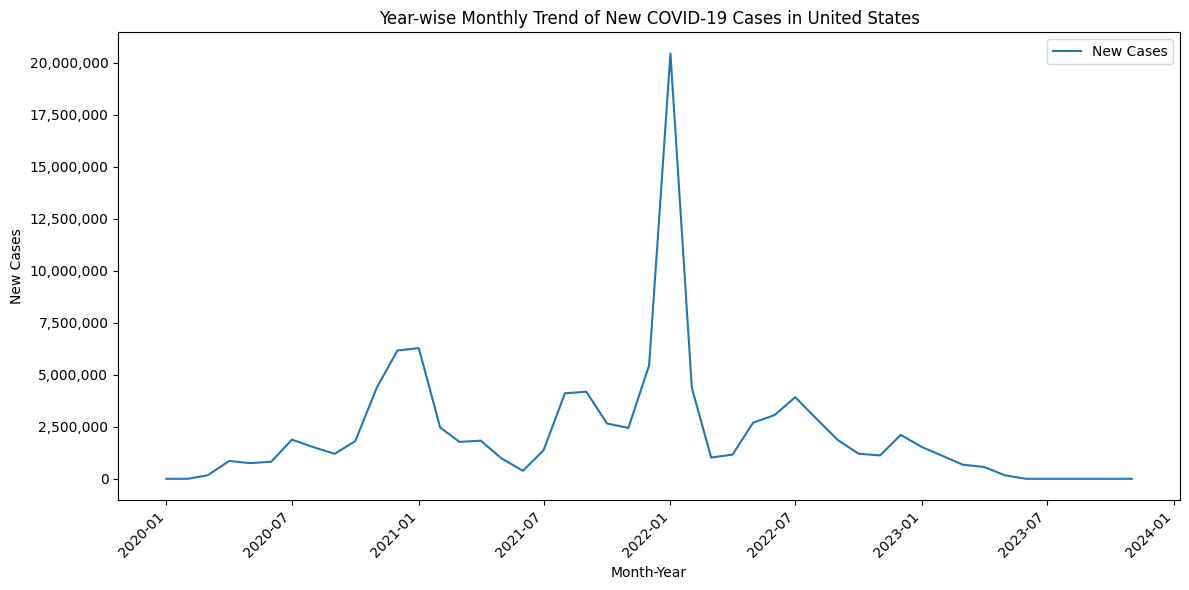

In [ ]:
#4. Visualize the Year wise monthly trend of new COVID-19 cases for user's selected country.

#Get user input for the country
country_name = input("Enter the country name: ")

#Filter the DataFrame for the specific country
country_data = df[df['location'] == country_name].copy()  # Create a copy to avoid the warning

#Extract year and month from the 'date' column
country_data['year'] = country_data['date'].dt.year
country_data['month'] = country_data['date'].dt.month

#Group data by year and month, and sum new cases
monthly_cases = country_data.groupby(['year', 'month'])['new_cases'].sum().reset_index()

#Create a 'month_year' column for better visualization
monthly_cases['month_year'] = pd.to_datetime(monthly_cases[['year', 'month']].assign(DAY=1))

#Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_cases['month_year'], monthly_cases['new_cases'], label='New Cases')

plt.xlabel('Month-Year')
plt.ylabel('New Cases')
plt.title(f'Year-wise Monthly Trend of New COVID-19 Cases in {country_name}')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))  # Format y-axis labels
plt.legend()
plt.tight_layout()
plt.show()

#Activity 7: Additional Insights
Extracting additional insights, examining the influence of external factors, and evaluating regional disparities for a holistic understanding of the COVID-19 landscape.

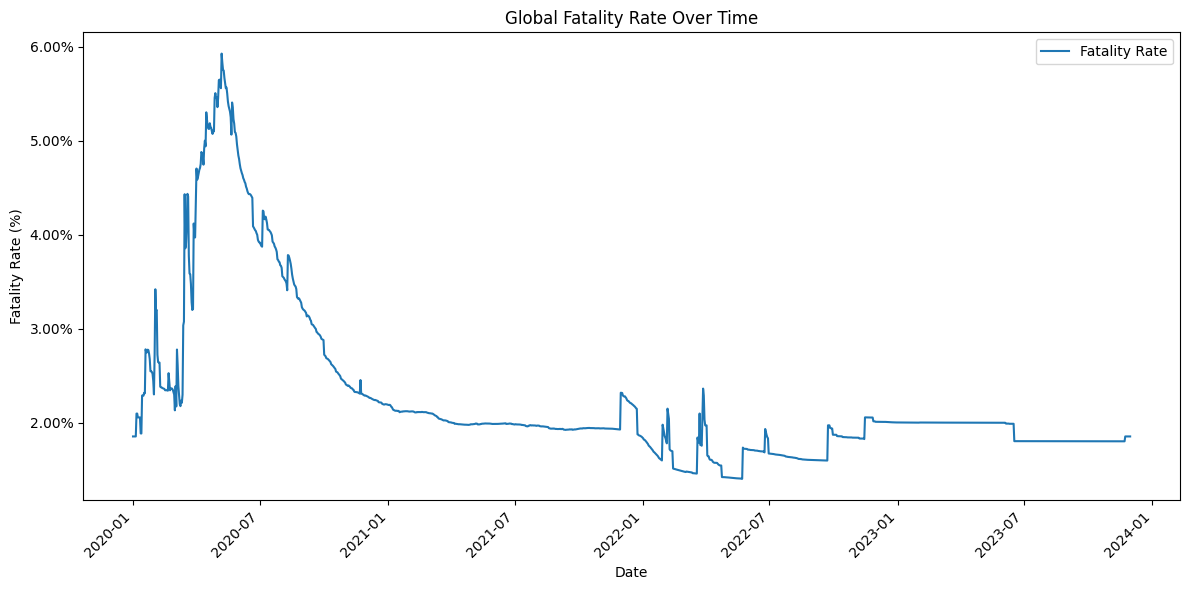

In [ ]:
#1. Visualize the fatality rate (total deaths / total cases) over time globally.

#Calculate the fatality rate
df['fatality_rate'] = df['total_deaths'] / df['total_cases']

#Filter out potential outliers (fatality rate > 1)
df = df[df['fatality_rate'] <= 1]

#Group data by date and calculate the average fatality rate
global_fatality_rate = df.groupby('date')['fatality_rate'].mean().reset_index()

#Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(global_fatality_rate['date'], global_fatality_rate['fatality_rate'], label='Fatality Rate')

plt.xlabel('Date')
plt.ylabel('Fatality Rate (%)')
plt.title('Global Fatality Rate Over Time')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}%'.format(x * 100)))  # Format as percentage
plt.legend()
plt.tight_layout()
plt.show()

 Added a step to filter out rows where the calculated fatality rate is greater than 1 (or 100%). This helps to remove potential outliers that might be due to data errors or inconsistencies, ensuring that the visualized fatality rate is within a reasonable range.

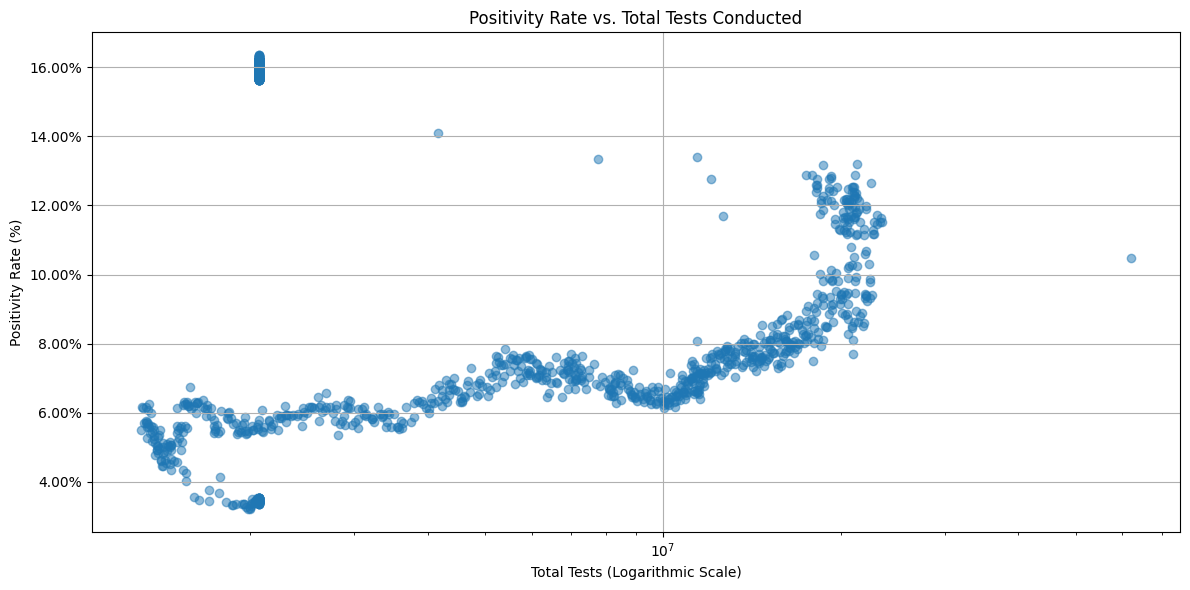

In [ ]:
#2. Explore the positivity rate (total_cases/ total tests) versus total tests conducted to analyse testing effectiveness using the x-axis as the logarithmic scale for better visualisation.

#Calculate positivity rate
df['positivity_rate'] = df['total_cases'] / df['total_tests']

#Filter out invalid data (e.g., positivity rate > 1 or total_tests = 0)
df = df[(df['positivity_rate'] <= 1) & (df['total_tests'] > 0)]

#Group data by date and calculate average positivity rate and total tests
daily_data = df.groupby('date')[['positivity_rate', 'total_tests']].mean().reset_index()

#Create the scatter plot with logarithmic x-axis
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['total_tests'], daily_data['positivity_rate'], alpha=0.5)  # alpha for transparency

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Total Tests (Logarithmic Scale)')
plt.ylabel('Positivity Rate (%)')
plt.title('Positivity Rate vs. Total Tests Conducted')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}%'.format(x * 100)))  # Format as percentage
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()

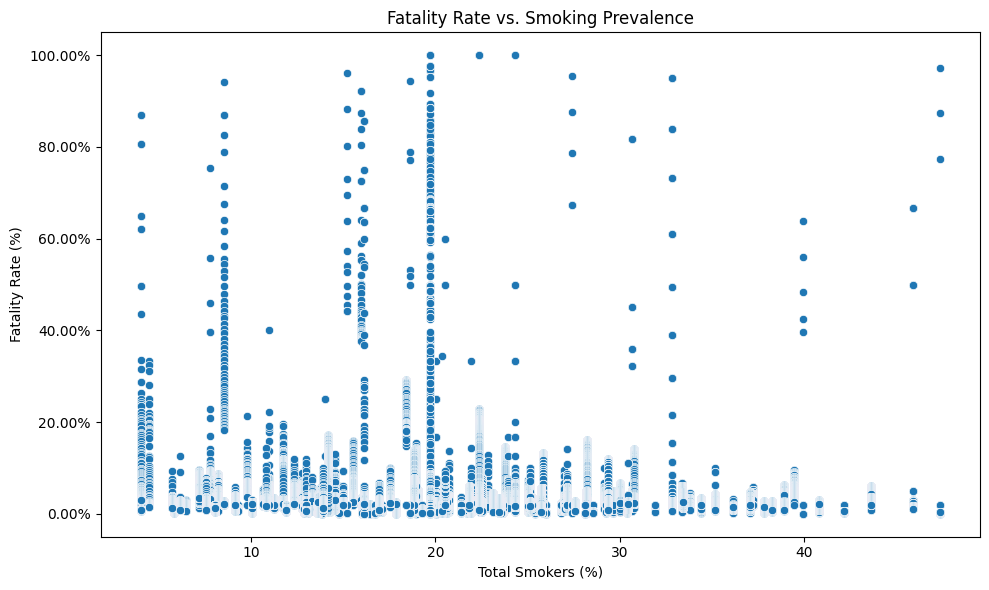

Correlation between total smokers and fatality rate: -0.02


In [ ]:
#3. Analyze the fatality rate and its relationship with smoking (Use male_smokers and female_smokers columns).

#Calculate fatality rate
df['fatality_rate'] = df['total_deaths'] / df['total_cases']

#Calculate total smokers (assuming male_smokers and female_smokers are percentages)
df['total_smokers'] = (df['male_smokers'] + df['female_smokers']) / 2  # Average of male and female smokers

#Filter out invalid data (e.g., fatality rate > 1)
df = df[df['fatality_rate'] <= 1]

#Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_smokers', y='fatality_rate', data=df)
plt.xlabel('Total Smokers (%)')
plt.ylabel('Fatality Rate (%)')
plt.title('Fatality Rate vs. Smoking Prevalence')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.2f}%'.format(x * 100)))  # Format as percentage
plt.tight_layout()
plt.show()

#Calculate correlation
correlation = df['total_smokers'].corr(df['fatality_rate'])
print(f"Correlation between total smokers and fatality rate: {correlation:.2f}")

A correlation coefficient of -0.02 indicates a very weak negative correlation between total smokers and fatality rate. This means that there is a slight tendency for countries with higher smoking prevalence to have lower fatality rates, but this relationship is very weak and might not be statistically significant.

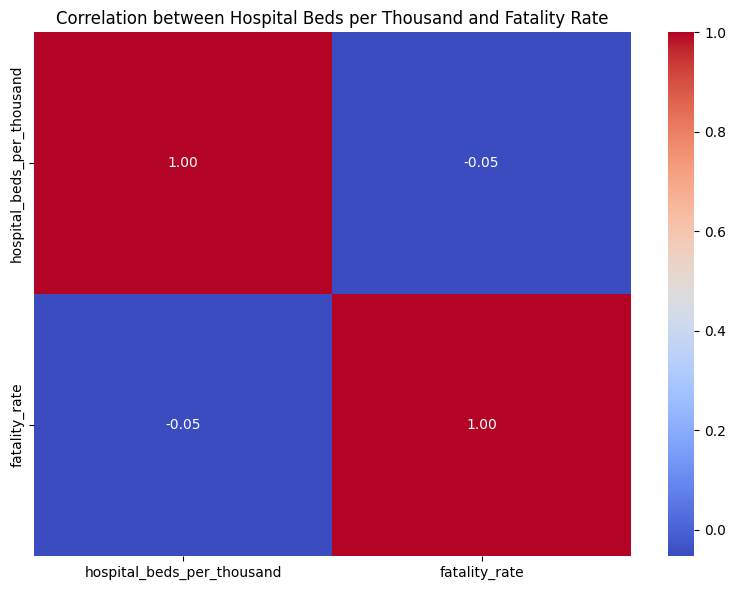

In [ ]:
#4. Create a heatmap to analyse the relationship between hospital beds per thousand and fatality rate.

#Calculate fatality rate if not already calculated
df['fatality_rate'] = df['total_deaths'] / df['total_cases']

#Filter out invalid data (e.g., fatality rate > 1)
df = df[df['fatality_rate'] <= 1]

#Create a correlation matrix
correlation_matrix = df[['hospital_beds_per_thousand', 'fatality_rate']].corr()

#Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Hospital Beds per Thousand and Fatality Rate')
plt.tight_layout()
plt.show()
